In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('Unormalized_inputs_corrected.xls')


In [3]:
df

,Label (1=tsm),EN_min,EN_sq,NE_max,NE_min,NE_sq,NE_tot,dsq,dnn,fcc,EA_max,EA_min,EA_sq
0,1,1.70,2.05,6,5,5,16.00,2.935900,3.2470,5.016479,1.047401,0.300,1.047401
1,1,1.33,1.90,6,4,4,14.00,2.505990,2.8120,4.340239,2.077103,0.426,1.389520
2,1,1.33,1.90,6,4,4,14.00,2.561850,2.8050,4.340239,2.020670,0.426,1.389520
3,1,1.33,2.01,6,4,4,14.00,2.563970,2.8610,4.514685,2.077103,0.426,1.232712
4,1,1.33,2.01,6,4,4,14.00,2.620540,2.8580,4.514685,2.020670,0.426,1.232712
...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,0,1.80,3.44,11,4,6,42.00,2.813366,2.4710,3.314718,3.363588,0.364,1.461112
875,0,1.80,3.44,11,4,6,42.00,2.790880,2.3750,3.314718,3.612724,0.364,1.461112
876,0,1.12,3.44,7,4,6,19.50,2.846812,2.5763,3.314718,2.020670,-1.416,1.461112
877,0,1.17,3.44,8,5,6,25.08,2.759385,2.3860,3.314718,1.461112,0.151,1.461112


In [4]:
X = df.iloc[:, 1:]


In [5]:
X

,EN_min,EN_sq,NE_max,NE_min,NE_sq,NE_tot,dsq,dnn,fcc,EA_max,EA_min,EA_sq
0,1.70,2.05,6,5,5,16.00,2.935900,3.2470,5.016479,1.047401,0.300,1.047401
1,1.33,1.90,6,4,4,14.00,2.505990,2.8120,4.340239,2.077103,0.426,1.389520
2,1.33,1.90,6,4,4,14.00,2.561850,2.8050,4.340239,2.020670,0.426,1.389520
3,1.33,2.01,6,4,4,14.00,2.563970,2.8610,4.514685,2.077103,0.426,1.232712
4,1.33,2.01,6,4,4,14.00,2.620540,2.8580,4.514685,2.020670,0.426,1.232712
...,...,...,...,...,...,...,...,...,...,...,...,...
874,1.80,3.44,11,4,6,42.00,2.813366,2.4710,3.314718,3.363588,0.364,1.461112
875,1.80,3.44,11,4,6,42.00,2.790880,2.3750,3.314718,3.612724,0.364,1.461112
876,1.12,3.44,7,4,6,19.50,2.846812,2.5763,3.314718,2.020670,-1.416,1.461112
877,1.17,3.44,8,5,6,25.08,2.759385,2.3860,3.314718,1.461112,0.151,1.461112


In [6]:
# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Perform PCA
num_pca = 5
pca = PCA(n_components=num_pca)

pca_feats = pca.fit_transform(X_normalized)

df_pca = pd.DataFrame(pca_feats, columns=[f'PC{i+1}' for i in range(pca_feats.shape[1])])

df_pca_with_labels = pd.concat([df.iloc[:, 0], df_pca], axis=1)


In [7]:
df_pca_with_labels

,Label (1=tsm),PC1,PC2,PC3,PC4,PC5
0,1,1.787324,1.282649,-0.079173,2.268380,-1.172489
1,1,0.180847,-0.155818,-0.115754,2.616766,0.666354
2,1,0.281291,-0.177497,-0.196461,2.510529,0.590890
3,1,0.400002,-0.080973,-0.280201,2.505041,0.519948
4,1,0.505771,-0.099754,-0.364966,2.397072,0.440780
...,...,...,...,...,...,...
874,0,-2.948371,1.971367,0.618789,-0.015736,0.431141
875,0,-3.191044,1.878431,0.618923,0.048156,0.499376
876,0,-0.967405,-1.509604,0.629886,-0.597435,-1.095856
877,0,-1.677974,-0.010768,0.598394,0.273082,0.147877


In [8]:
pca_feats.shape

(879, 5)

Text(0, 0.5, 'Explained Var')

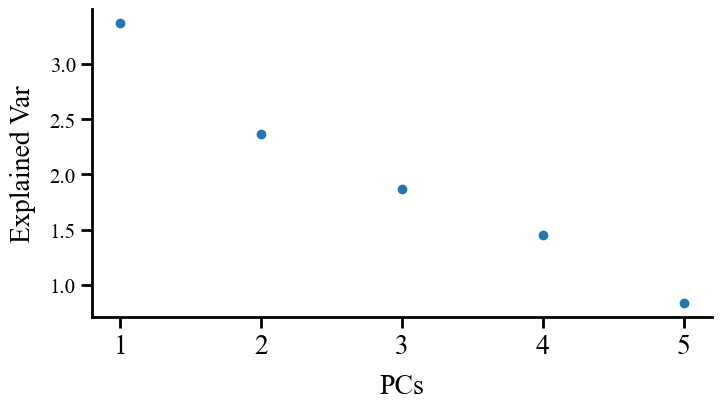

In [9]:
plt.figure(figsize=(8,4))
plt.rcParams['font.family']='Times New Roman'
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)

ax.spines['left'].set_linewidth(2)

plt.plot(np.arange(0, num_pca), pca.explained_variance_, "o")
plt.xticks([0,1,2,3,4],[1,2,3,4,5])
plt.tick_params(axis='y',length=8, width=2, labelsize=15)
plt.tick_params(axis='x',length=8, width=2, labelsize=20)
plt.xlabel(r'PCs',size=20,labelpad=10)
plt.ylabel(r'Explained Var',size=20,labelpad=10)


In [82]:
def plot_pca_coefficients(num):
    """
    Plots the coefficients of the specified principal component (PC) as a bar plot.
    
    Parameters:
    - pca: The PCA object (fitted).
    - num: The principal component number to plot (1-based index).
    """
    # Select the principal component
    component = np.abs(pca.components_[num - 1])  # num corresponds to the specified principal component
    
    # Plot setup
    plt.figure(figsize=(10, 3))
    plt.rcParams['font.family'] = 'Times New Roman'
    
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    
    # Set y-axis limits and ticks
    #plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1.2, 0.2), np.round(np.arange(0, 1.2, 0.2), 2))
    plt.tick_params(axis='y', length=8, width=2, labelsize=30)
    plt.tick_params(axis='x', length=8, width=2, labelsize=30)
    
    # Plot the coefficients as a bar plot
    plt.bar(range(len(component)), component, color='steelblue')
    
    # Customize x-ticks with descriptors
    plt.xticks(
        range(len(component)),
        ['$\chi_{min}$', '$\chi_{sq}$', '$NE_{max}$', '$NE_{min}$', '$NE_{sq}$', '$NE_{tot}$',
         '$d_{sq}$', '$d_{nn}$', 'fcc', '$EA_{max}$', '$EA_{min}$', '$EA_{sq}$'],
        rotation=60, size=30
    )
    
    # Set the x-axis label
    plt.ylabel(f'$|(PC_{num})_i|$', size=35, labelpad=10)
    
    # Optionally save the figure
    plt.savefig(f"PC{num}_coeff.pdf", bbox_inches='tight')
    
    # Show the plot
    plt.show()

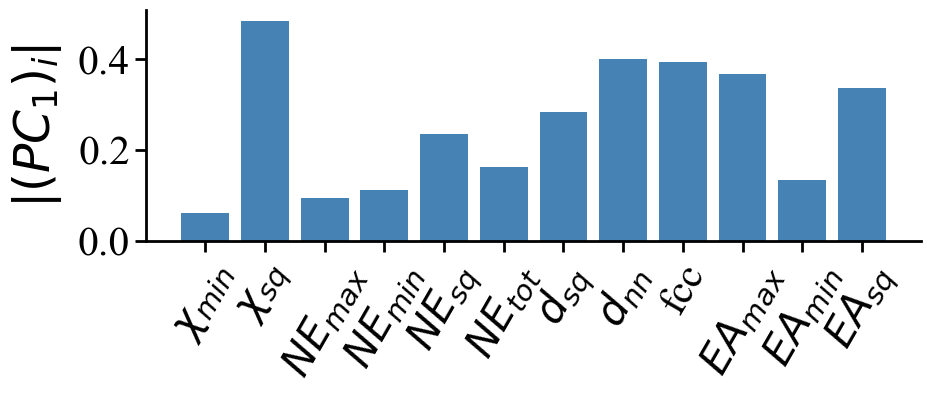

In [83]:
plot_pca_coefficients(1)

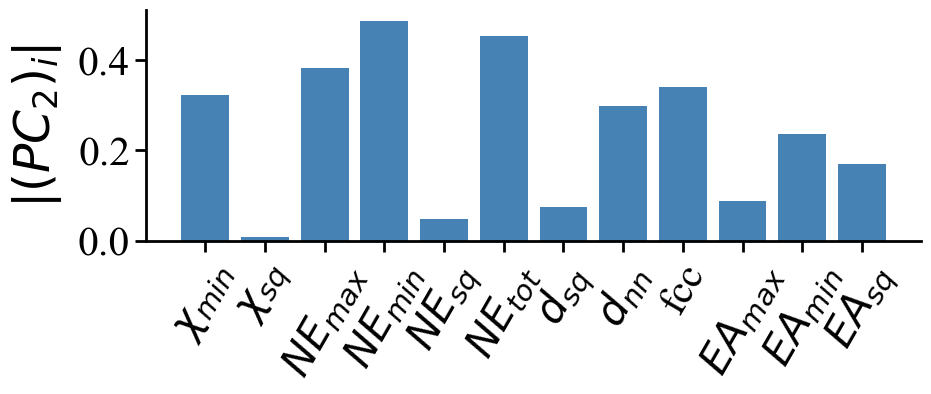

In [84]:
plot_pca_coefficients(2)

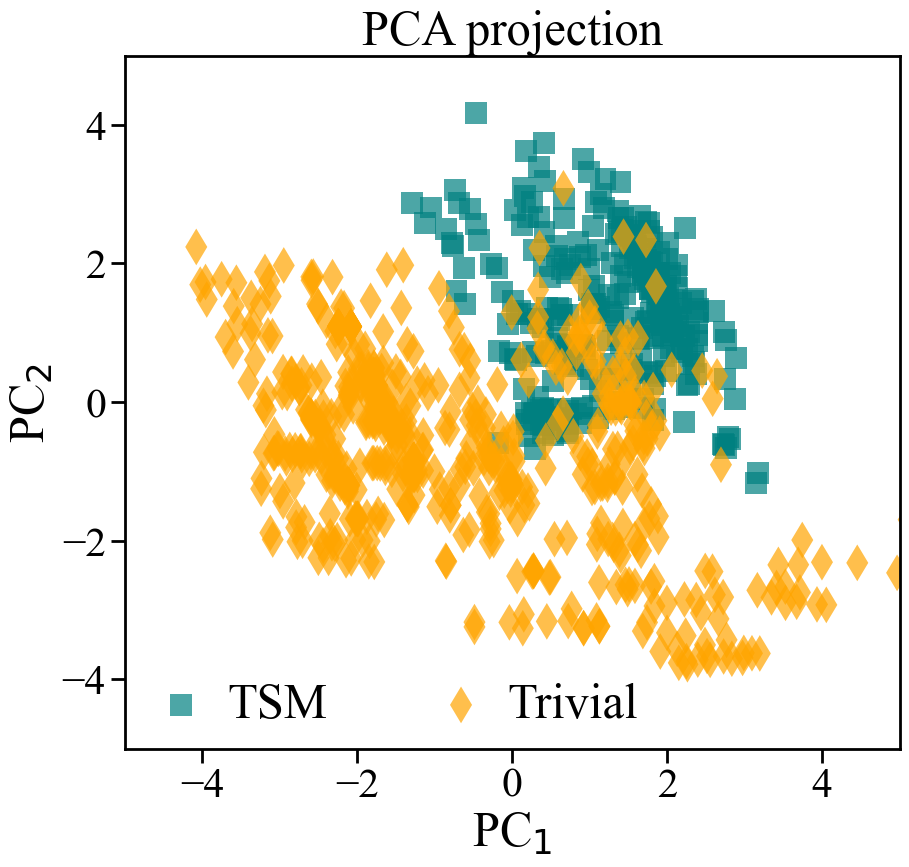

In [69]:
# Select the first and second principal components by index
pc1_index = 1  # PC1 is the first principal component
pc2_index = 2  # PC2 is the second principal component

# Extract PC1 and PC2 for TSM and Trivial groups
pc1_tsm = df_pca_with_labels[df_pca_with_labels.iloc[:, 0] == 1].iloc[:, pc1_index]
pc2_tsm = df_pca_with_labels[df_pca_with_labels.iloc[:, 0] == 1].iloc[:, pc2_index]

pc1_tri = df_pca_with_labels[df_pca_with_labels.iloc[:, 0] == 0].iloc[:, pc1_index]
pc2_tri = df_pca_with_labels[df_pca_with_labels.iloc[:, 0] == 0].iloc[:, pc2_index]

# Plot 
plt.figure(figsize=(10, 9))
plt.rcParams['font.family'] = 'Times New Roman'

ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Scatter plot for TSM
plt.scatter(pc1_tsm, pc2_tsm, color='teal', s=250, alpha=0.7, edgecolor='none', marker='s', label='TSM')

# Scatter plot for Trivial
plt.scatter(pc1_tri, pc2_tri, color='orange', s=350, alpha=0.7, edgecolor='none', marker='d', label='Trivial')


# Labels and Title
plt.xlabel(r'PC$_1$', size=35)
plt.ylabel(r'PC$_2$', size=35)
plt.title('PCA projection', size=35)

# Ticks
plt.xticks(np.arange(-4, 5, 2), size=30)  # Adjust x-ticks as needed based on the data range
plt.yticks(np.arange(-4, 5, 2), size=30)  # Adjust y-ticks as needed based on the data range
plt.tick_params(length=10, width=2, labelsize=30)

# Set limits for x and y axis
plt.xlim([-5, 5])  # Adjust limits based on your data range
plt.ylim([-5, 5])  # Adjust limits based on your data range

# Add legend
plt.legend(frameon=False, fontsize=35, ncols=2, labelspacing=0.3, handlelength=1.5, handletextpad=0.2, borderaxespad=0.01)

plt.savefig('pca_2d_scatter.svg', bbox_inches='tight', transparent=True)

# Show the plot
plt.show()


In [105]:
# Materials distribution on PC_ind
import seaborn as sns

def plot_pca_distribution(ind):


    tsm = df_pca_with_labels[df_pca_with_labels.iloc[:, 0] == 1].iloc[:, ind]
    tri = df_pca_with_labels[df_pca_with_labels.iloc[:, 0] == 0].iloc[:, ind]


    plt.figure(figsize=(11,3))


    sns.histplot(tsm, bins=30,binrange=(-1.2,1.2), color="teal", label="TSM", kde=False,element='step')
    sns.histplot(tri, bins=30,binrange=(-1.2,1.2), color="orange", label="Trivial", kde=False,element='step')


    #plt.xlim([-1.5,1.5])
    plt.yscale('log')

    plt.rcParams['font.family']='Times New Roman'

    #plt.xticks(np.arange(-1.2,1.4,0.4),size=25)
    plt.yticks(ticks=[1,10,100],labels=['1','10','100'],size=30)

    plt.xlabel('PC'+str(ind),size=35)
    plt.ylabel(r'Counts',size=35)


    plt.minorticks_off()

    plt.legend(fontsize=25,frameon=False,labelspacing=0.25,handlelength=1.5,handletextpad=0.2,borderaxespad=0.01) 
    #plt.savefig(r'PC'+str(ind)+'_classification.svg',bbox_inches='tight',transparent='True')
    plt.show()

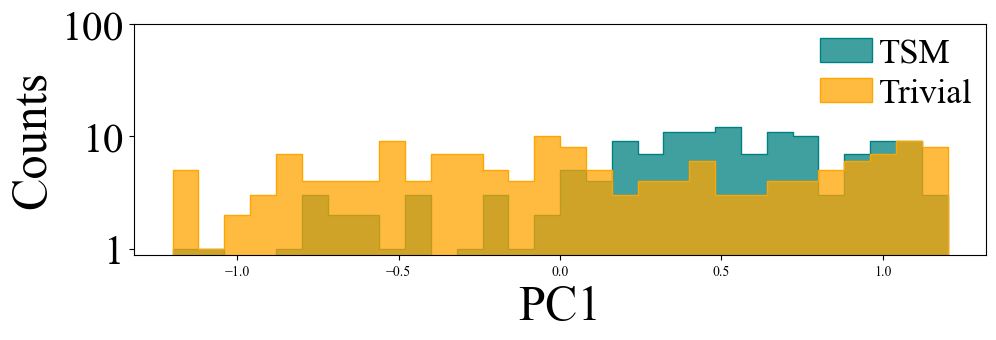

In [106]:
plot_pca_distribution(1)

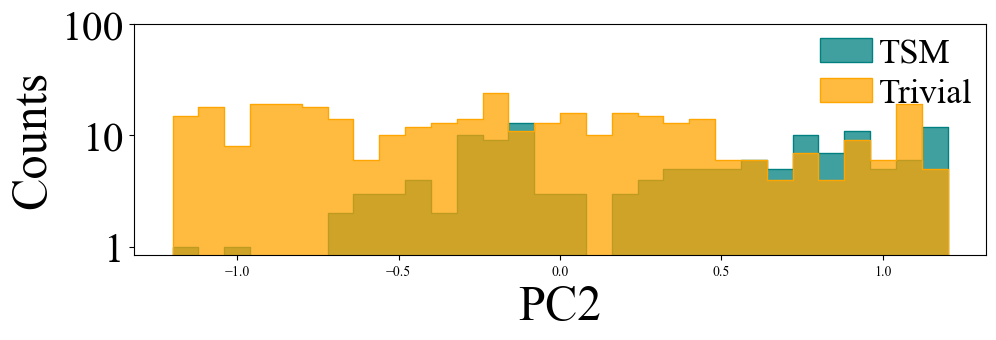

In [107]:
plot_pca_distribution(2)

In [1]:
#read X1 for tsm data and X0 for trivial compound data
import xlrd
file_loc=r'/Users/yanjunliu/Downloads/code_record/TSM'
excel = xlrd.open_workbook(file_loc+r'/Unormalized_inputs.xls')
all_sheet = excel.sheets()
inputs = all_sheet[0]
X1, X0, y=[], [], []
len1=311
len0=568
for i in range(len1):
    X1.append(inputs.row_values(i+1)[1:])
    y.append(inputs.row_values(i+1)[:1])
for i in range(len0):
    X0.append(inputs.row_values(len1+i)[1:])
    y.append(inputs.row_values(i+1)[:1])

Text(0, 0.5, 'Explained Var')

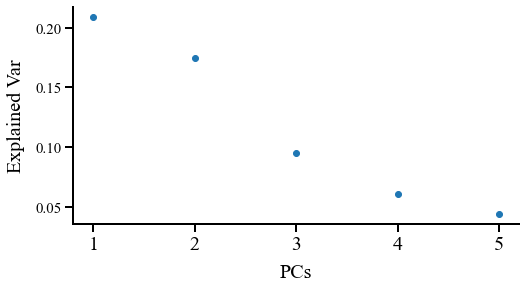

In [3]:
#PCA, fitting and plotting the variance
from sklearn.decomposition import PCA
import copy
import numpy as np
import matplotlib.pyplot as plt
#Normalization
X1f=copy.deepcopy(X1)
X0f=copy.deepcopy(X0)
for i in range(len(X1f[0])):
    buffer=[X1f[j][i] for j in range(len(X1f))]
    max1=np.max(buffer)
    min1=np.min(buffer)
    len1=max1-min1
    for j in range(len(X1f)):
        X1f[j][i]=(X1f[j][i]-min1)/len1
        
for i in range(len(X0f[0])):
    buffer=[X0f[j][i] for j in range(len(X0f))]
    max0=np.max(buffer)
    min0=np.min(buffer)
    len0=max0-min0
    for j in range(len(X0f)):
        X0f[j][i]=(X0f[j][i]-min0)/len0
        
feats=[]
feats.extend(X1f)
feats.extend(X0f)
num_pca = 5
pca = PCA(n_components=num_pca)
pca_feats = pca.fit_transform(feats)
plt.figure(figsize=(8,4))
plt.rcParams['font.family']='Times New Roman'
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)

ax.spines['left'].set_linewidth(2)

plt.plot(np.arange(0, num_pca), pca.explained_variance_, "o")
plt.xticks([0,1,2,3,4],[1,2,3,4,5])
plt.tick_params(axis='y',length=8, width=2, labelsize=15)
plt.tick_params(axis='x',length=8, width=2, labelsize=20)
plt.xlabel(r'PCs',size=20,labelpad=10)
plt.ylabel(r'Explained Var',size=20,labelpad=10)
#plt.savefig("/Users/yanjunliu/Documents/TSM/1d descriptor/PCvar.pdf")

[0.54732345 0.01245971 0.24061691 0.54797263 0.12916398 0.32910942
 0.20626942 0.11450049 0.10020469 0.33945461 0.01102664 0.18990923]


Text(0.5, 0, 'PC3_coeff')

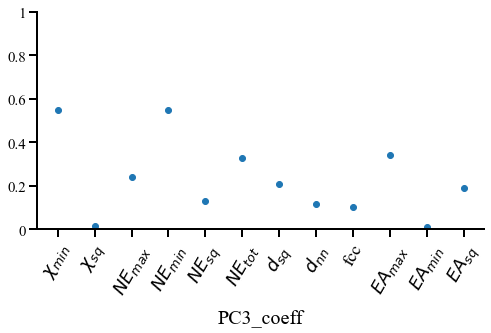

In [4]:
#PCA, plotting coefficients
num=3
rank=12
component=pca.components_[num-1]
print(abs(component))

ind=[i for i in range(rank)]
plt.figure(figsize=(8,4))
plt.rcParams['font.family']='Times New Roman'
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)

ax.spines['left'].set_linewidth(2)
plt.ylim(0,1)
plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1])
plt.tick_params(axis='y',length=8, width=2, labelsize=15)
plt.tick_params(axis='x',length=8, width=2, labelsize=20)
plt.scatter(ind, abs(component))
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
           ['$\chi_{min}$', '$\chi_{sq}$', '$NE_{max}$', '$NE_{min}$', '$NE_{sq}$', '$NE_{tot}$', '$d_{sq}$', '$d_{nn}$', 'fcc', '$EA_{max}$', '$EA_{min}$', '$EA_{sq}$'],
           rotation=60,size=18)
plt.xlabel(r'PC'+str(num)+'_coeff',size=20,labelpad=10)
#plt.savefig("/Users/yanjunliu/Documents/TSM/1d descriptor/PC'+str(num)+'coeff.pdf")

311 568


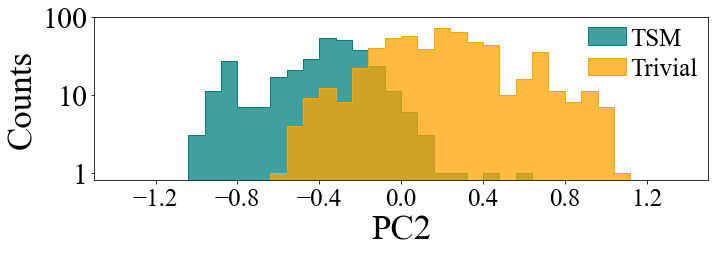

In [5]:
# Materials distribution on PC_ind
import seaborn as sns

ind=2
tsm=[pca_feats[i][ind-1] for i in range(len(X1))] 
tri=[pca_feats[len(X1)+i][ind-1] for i in range(len(X0))]
print(len(tsm),len(tri))


#sns.set(style="darkgrid")

plt.figure(figsize=(11,3))


sns.histplot(tsm, bins=30,binrange=(-1.2,1.2), color="teal", label="TSM", kde=False,element='step')
sns.histplot(tri, bins=30,binrange=(-1.2,1.2), color="orange", label="Trivial", kde=False,element='step')

#plt.plot([5.32,5.32], [0,250],lw=3.5,linestyle=':',color='black',alpha=0.8)
#plt.plot([7.7,7.7], [0,250],lw=2.5,linestyle='--',color='black',alpha=0.8)

plt.xlim([-1.5,1.5])
plt.yscale('log')

plt.rcParams['font.family']='Times New Roman'

plt.xticks(np.arange(-1.2,1.4,0.4),size=25)
plt.yticks(ticks=[1,10,100],labels=['1','10','100'],size=30)

plt.xlabel('PC'+str(ind),size=35)
plt.ylabel(r'Counts',size=35)


plt.minorticks_off()

plt.legend(fontsize=25,frameon=False,labelspacing=0.25,handlelength=1.5,handletextpad=0.2,borderaxespad=0.01) 
#plt.savefig(r'PC'+str(ind)+'_classification.svg',bbox_inches='tight',transparent='True')
plt.show()

In [6]:
print(max(np.abs(tsm)),max(np.abs(tri)))

1.018748167384006 1.0428432367957565


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, k

/Users/yanjunliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yanjunliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yanjunliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yanjunliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................

/Users/yanjunliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yanjunliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yanjunliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yanjunliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

/Users/yanjunliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yanjunliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yanjunliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yanjunliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................

/Users/yanjunliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yanjunliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yanjunliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yanjunliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

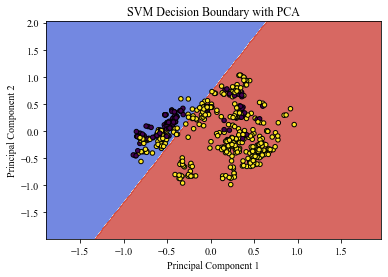

In [7]:
#SVM

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X=copy.deepcopy(X1f)+copy.deepcopy(X0f)


# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


svm_classifier = SVC()

# grid_search
param_grid = {
    'C': [0.1,1,10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(svm_classifier, param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

# use the best model
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# print results and best parameters
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nBest Parameters Found:")
print(grid_search.best_params_)

print("\nNumber of Support Vectors:")
print(len(best_svm.support_vectors_))

# 如果想分别查看每个类的支持向量数量
print("\nNumber of Support Vectors for Each Class:")
print(best_svm.n_support_)


# Use the best model to fit the first 2 PCs 
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


best_svm.fit(X_train_pca, y_train)

# visualization
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


Z = best_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k')
plt.title('SVM Decision Boundary with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
